In [1]:
%matplotlib inline

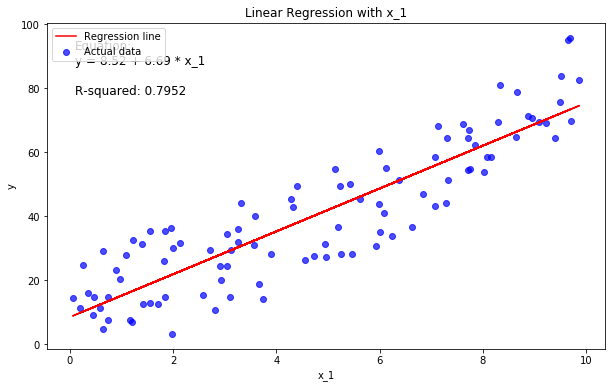

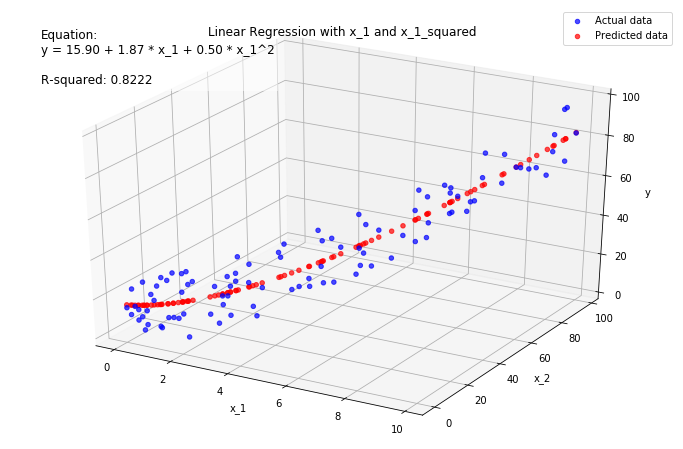

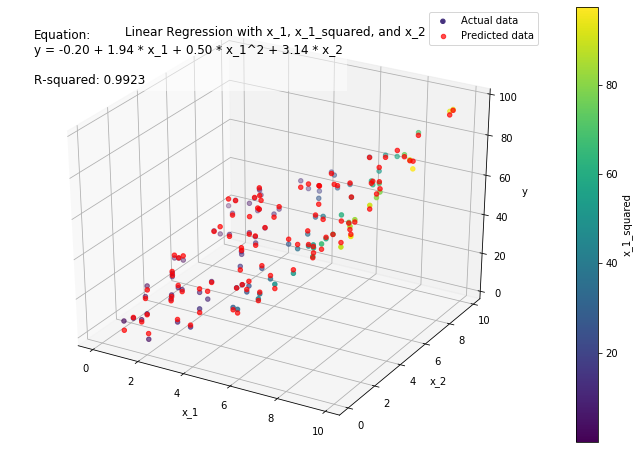

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D

# Set random seed for reproducibility
np.random.seed(42)

def create_dataset(n_samples=100):
    x_1 = np.random.uniform(0, 10, n_samples)
    x_2 = np.random.uniform(0, 10, n_samples)
    x_1_squared = x_1 ** 2
    
    # Create target with some noise
    y = 2 * x_1 + 0.5 * x_1_squared + 3 * x_2 + np.random.normal(0, 2, n_samples)
    
    return x_1, x_1_squared, x_2, y

def plot_2d(X, y, y_pred, title, equation, r2):
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', alpha=0.7, label='Actual data')
    plt.plot(X, y_pred, color='red', label='Regression line')
    plt.xlabel('x_1')
    plt.ylabel('y')
    plt.title(title)
    
    # Adjust text position and spacing for readability
    plt.text(0.05, 0.95, f'Equation:\n{equation}\n\nR-squared: {r2:.4f}', 
             transform=plt.gca().transAxes, verticalalignment='top', fontsize=12, 
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    
    plt.legend()
    plt.show()

def plot_3d(X, y, y_pred, title, equation, r2):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], y, color='blue', alpha=0.7, label='Actual data')
    ax.scatter(X[:, 0], X[:, 1], y_pred, color='red', alpha=0.7, label='Predicted data')
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.set_zlabel('y')
    ax.set_title(title)
    
    # Adjust text position and spacing for readability
    ax.text2D(0.05, 0.95, f'Equation:\n{equation}\n\nR-squared: {r2:.4f}', 
              transform=ax.transAxes, verticalalignment='top', fontsize=12,
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    
    plt.legend()
    plt.show()

# Create dataset
x_1, x_1_squared, x_2, y = create_dataset()

# 1. Linear Regression with x_1
X_1 = x_1.reshape(-1, 1)
reg_1 = LinearRegression().fit(X_1, y)
y_pred_1 = reg_1.predict(X_1)
r2_1 = r2_score(y, y_pred_1)
equation_1 = f'y = {reg_1.intercept_:.2f} + {reg_1.coef_[0]:.2f} * x_1'
plot_2d(x_1, y, y_pred_1, 'Linear Regression with x_1', equation_1, r2_1)

# 2. Linear Regression with x_1 and x_1_squared
X_2 = np.column_stack((x_1, x_1_squared))
reg_2 = LinearRegression().fit(X_2, y)
y_pred_2 = reg_2.predict(X_2)
r2_2 = r2_score(y, y_pred_2)
equation_2 = f'y = {reg_2.intercept_:.2f} + {reg_2.coef_[0]:.2f} * x_1 + {reg_2.coef_[1]:.2f} * x_1^2'
plot_3d(X_2, y, y_pred_2, 'Linear Regression with x_1 and x_1_squared', equation_2, r2_2)

# 3. Linear Regression with x_1, x_1_squared, and x_2
X_3 = np.column_stack((x_1, x_1_squared, x_2))
reg_3 = LinearRegression().fit(X_3, y)
y_pred_3 = reg_3.predict(X_3)
r2_3 = r2_score(y, y_pred_3)
equation_3 = f'y = {reg_3.intercept_:.2f} + {reg_3.coef_[0]:.2f} * x_1 + {reg_3.coef_[1]:.2f} * x_1^2 + {reg_3.coef_[2]:.2f} * x_2'

# For the 3D plot with all features, we'll use x_1 and x_2 for the axes and color for the third dimension
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_1, x_2, y, c=x_1_squared, cmap='viridis', label='Actual data')
ax.scatter(x_1, x_2, y_pred_3, color='red', alpha=0.7, label='Predicted data')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')
ax.set_title('Linear Regression with x_1, x_1_squared, and x_2')

# Adjust text position and spacing for readability
ax.text2D(0.05, 0.95, f'Equation:\n{equation_3}\n\nR-squared: {r2_3:.4f}', 
          transform=ax.transAxes, verticalalignment='top', fontsize=12,
          bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

plt.colorbar(scatter, label='x_1_squared')
plt.legend()
plt.show()